In [1]:
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clustering Jerarquico

In [281]:
np.random.seed(1)
clicks = np.concatenate(
    (np.random.uniform(1,5,10),
     np.random.uniform(7,10,10),
     np.random.normal(3,1,10),
     np.random.normal(8.5,1,10))
).round(2)
compras = np.concatenate(
    (np.random.uniform(1,5,10),
     np.random.normal(3,1,10),
     np.random.uniform(7,10,10),
     np.random.normal(8.5,1,10))
).round(0)

data = pd.DataFrame(
    {
        "Clicks": (clicks*100).astype("int"),
        "Compras": compras.astype("int")
    }
)
data.head()

,Clicks,Compras
0,267,3
1,388,1
2,100,3
3,221,2
4,159,3


Graficar datos en scatterplot

<Axes: xlabel='Clicks', ylabel='Compras'>

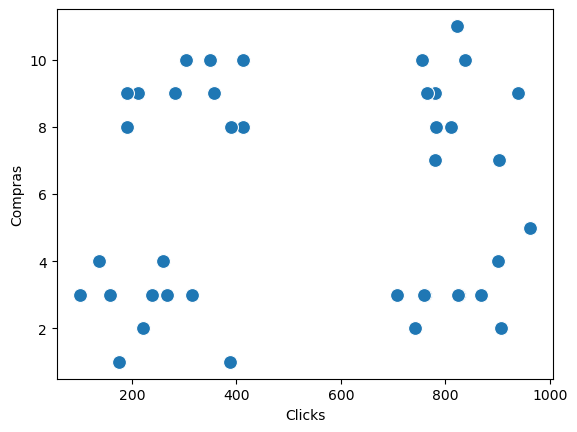

In [235]:
sns.scatterplot(
    data,
    x = "Clicks",
    y = "Compras",
    s = 100
)

Normalizar la data

In [236]:
from sklearn.preprocessing import MinMaxScaler

In [282]:
scaler = MinMaxScaler()
columnas = data.columns 

data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=columnas)

In [238]:
data.head()

,Clicks,Compras
0,0.193511,0.2
1,0.333720,0.0
2,0.000000,0.2
3,0.140209,0.1
4,0.068366,0.2


Graficar dendograma con el método del centroide utilizando la distancia euclidea

In [241]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [242]:
Z = linkage(
    data,
    method = "centroid",
    metric = "euclidean"
)

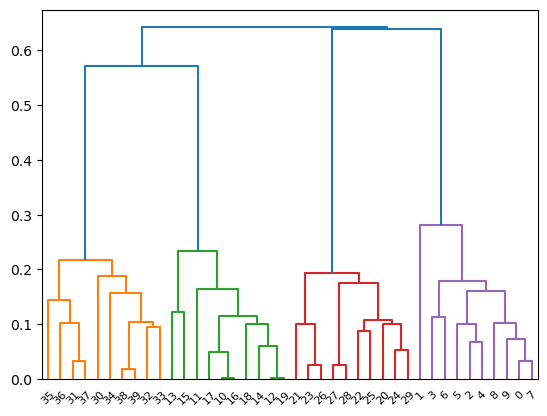

In [243]:
dendrogram(Z)
plt.show()

Calcular coeficiente de Cophonet

In [244]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [245]:
distancia_original = pdist(data)

In [246]:
cophenet(Z, distancia_original)[0]

0.8431017857229923

Determinar número de clusters con el método del codo

In [247]:
distancias = Z[:,2]
ultimas_distancias = distancias[:-11:-1]

In [248]:
clusters = range(1, len(ultimas_distancias)+1)

Text(0, 0.5, 'distancias')

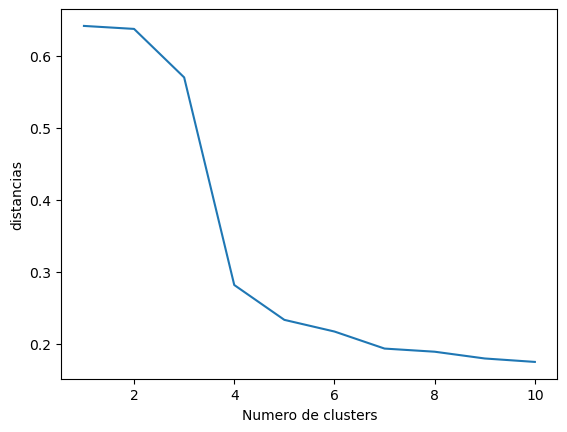

In [249]:
sns.lineplot(
    x = clusters,
    y = ultimas_distancias
)
plt.xlabel("Numero de clusters")
plt.ylabel("distancias")

Generar 4 clusters y mostrar el resultado en un dendograma con la linea horizontal mostrando la línea de corte. También mostrar un scatterplot con los clusters

In [257]:
Z

array([[1.00000000e+01, 1.60000000e+01, 1.15874855e-03, 2.00000000e+00],
       [1.20000000e+01, 1.90000000e+01, 2.31749710e-03, 2.00000000e+00],
       [3.80000000e+01, 3.90000000e+01, 1.85399768e-02, 2.00000000e+00],
       [2.30000000e+01, 2.60000000e+01, 2.54924681e-02, 2.00000000e+00],
       [2.70000000e+01, 2.80000000e+01, 2.66512167e-02, 2.00000000e+00],
       [3.10000000e+01, 3.70000000e+01, 3.24449594e-02, 2.00000000e+00],
       [0.00000000e+00, 7.00000000e+00, 3.36037080e-02, 2.00000000e+00],
       [1.70000000e+01, 4.00000000e+01, 4.92468134e-02, 3.00000000e+00],
       [2.40000000e+01, 2.90000000e+01, 5.33024334e-02, 2.00000000e+00],
       [1.40000000e+01, 4.10000000e+01, 6.02549247e-02, 3.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 6.83661645e-02, 2.00000000e+00],
       [9.00000000e+00, 4.60000000e+01, 7.35805330e-02, 3.00000000e+00],
       [2.20000000e+01, 2.50000000e+01, 8.69061414e-02, 2.00000000e+00],
       [3.20000000e+01, 3.30000000e+01, 9.50173812e

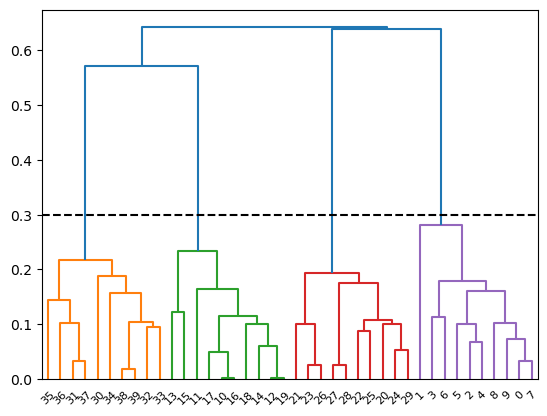

In [258]:
dendrogram(Z)
plt.axhline(y = 0.3, color = "black", ls = "--")
plt.show()

In [259]:
clusters = fcluster(Z, 0.3, criterion = "distance")

In [260]:
data["cluster"] = clusters

<Axes: xlabel='Clicks', ylabel='Compras'>

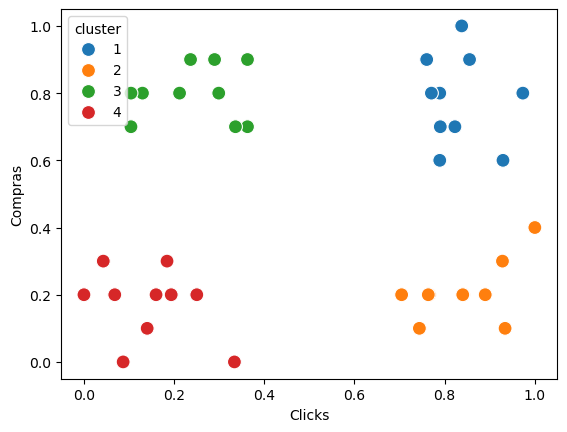

In [261]:
sns.scatterplot(
    data,
    x = "Clicks",
    y = "Compras",
    hue = "cluster",
    s = 100,
    palette = "tab10" 
)

In [262]:
data.groupby("cluster").mean()

,Clicks,Compras
cluster,,
1,0.831750,0.78
2,0.841136,0.21
3,0.243685,0.80
4,0.146002,0.17


Con 5 clusters

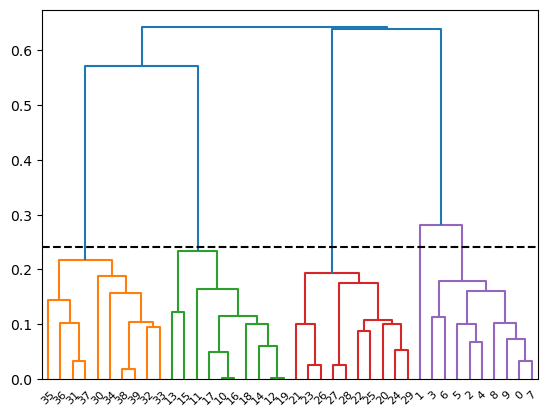

In [263]:
dendrogram(Z)
plt.axhline(y = 0.24, color = "black", ls = "--")
plt.show()

In [264]:
clusters = fcluster(Z, 0.24, criterion = "distance")

In [265]:
data["cluster"] = clusters

<Axes: xlabel='Clicks', ylabel='Compras'>

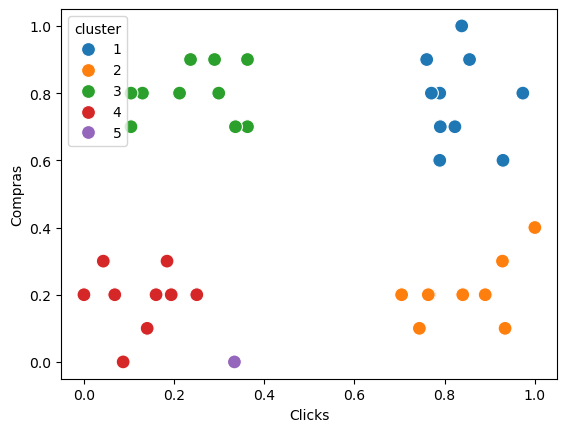

In [266]:
sns.scatterplot(
    data,
    x = "Clicks",
    y = "Compras",
    hue = "cluster",
    s = 100,
    palette = "tab10" 
)

In [267]:
data.groupby("cluster").mean()

,Clicks,Compras
cluster,,
1,0.831750,0.780000
2,0.841136,0.210000
3,0.243685,0.800000
4,0.125145,0.188889
5,0.333720,0.000000


Con 4 clusters utilizando el método de la distancia centroide en vez de la distancia mínima

In [283]:
Z = linkage(
    data,
    method = "single",
    metric = "euclidean"
)

In [284]:
Z

array([[1.00000000e+01, 1.60000000e+01, 1.15874855e-03, 2.00000000e+00],
       [1.20000000e+01, 1.90000000e+01, 2.31749710e-03, 2.00000000e+00],
       [3.80000000e+01, 3.90000000e+01, 1.85399768e-02, 2.00000000e+00],
       [2.30000000e+01, 2.60000000e+01, 2.54924681e-02, 2.00000000e+00],
       [2.70000000e+01, 2.80000000e+01, 2.66512167e-02, 2.00000000e+00],
       [3.10000000e+01, 3.70000000e+01, 3.24449594e-02, 2.00000000e+00],
       [0.00000000e+00, 7.00000000e+00, 3.36037080e-02, 2.00000000e+00],
       [1.70000000e+01, 4.00000000e+01, 4.86674392e-02, 3.00000000e+00],
       [2.40000000e+01, 2.90000000e+01, 5.33024334e-02, 2.00000000e+00],
       [9.00000000e+00, 4.60000000e+01, 5.67786790e-02, 3.00000000e+00],
       [1.40000000e+01, 4.10000000e+01, 5.90961761e-02, 3.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 6.83661645e-02, 2.00000000e+00],
       [2.00000000e+01, 4.80000000e+01, 7.30011587e-02, 3.00000000e+00],
       [4.70000000e+01, 5.00000000e+01, 7.41599073e

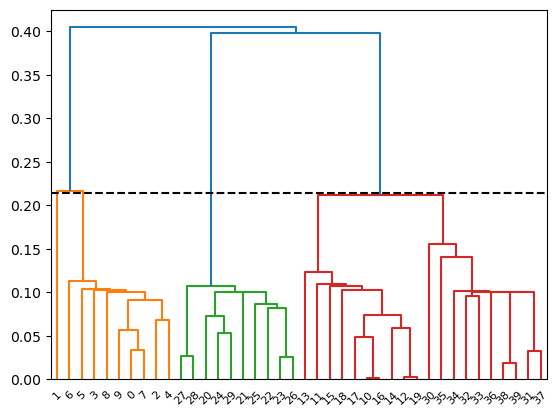

In [285]:
dendrogram(Z)
plt.axhline(y = 0.214, color = "black", ls = "--")
plt.show()

In [286]:
clusters = fcluster(Z, 0.214, criterion = "distance")

In [287]:
data["cluster"] = clusters

<Axes: xlabel='Clicks', ylabel='Compras'>

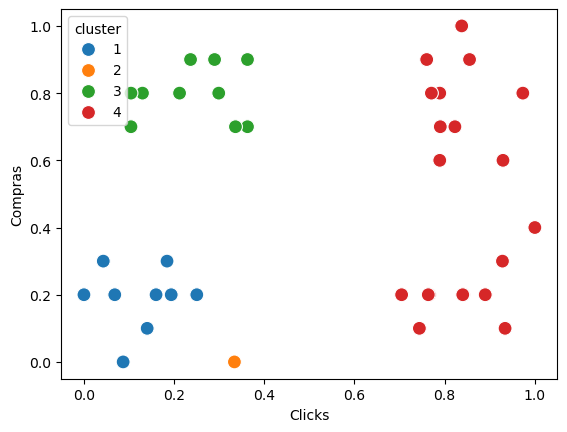

In [288]:
sns.scatterplot(
    data,
    x = "Clicks",
    y = "Compras",
    hue = "cluster",
    s = 100,
    palette = "tab10" 
)

In [289]:
data.groupby("cluster").mean()

,Clicks,Compras
cluster,,
1,0.125145,0.188889
2,0.333720,0.000000
3,0.243685,0.800000
4,0.836443,0.495000
